In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

In [5]:
#pip install scikit-learn
#!pip install imbalanced-learn


In [6]:
# Carregar o conjunto de dados
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
# Exibir as primeiras 5 linhas do conjunto de dados de forma mais legível
display(data.head())

# Informações sobre o conjunto de dados
origem = "Empresa XYZ Telecom"
nome = "Telco Customer Churn"
tamanho = data.shape
quantidade_registros = data.shape[0]
linhas_colunas = f"{data.shape[0]} linhas x {data.shape[1]} colunas"

# Verificar dados faltantes
dados_faltantes = data.isnull().sum()
# Tratar valores faltantes na coluna 'TotalCharges'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)
dados_faltantes_tratados = data.isnull().sum()

# Informações adicionais
conjunto_dados_link = "https://www.kaggle.com/datasets/blastchar/telco-customer-churn"
preprocessamento_info = """
Pré-processamento:
- Criação de uma variável binária para representar o churn, com base em algum limiar específico.
- Normalização das variáveis numéricas 
- One-Hot Encoding das variáveis categóricas 
"""



justificativa_modelo = """
Justificativa: O Modelo 1 foi escolhido devido ao seu bom desempenho em termos de acurácia e precisão. A alta acurácia é crucial para a empresa de telecomunicações na identificação de clientes propensos a cancelar seus serviços, enquanto a alta precisão ajuda a reduzir falsos positivos, o que pode economizar recursos da empresa.
"""

print("Informações sobre o Conjunto de Dados:")
print(f"\nOrigem: {origem}\n"
      f"\nNome: {nome}\n"
      f"\nTamanho: 176 KB\n"
      f"\nQuantidade de Registros: Existem {quantidade_registros} registros no conjunto de dados, representando clientes da empresa.\n"
      f"\nLinhas x Colunas: O conjunto de dados possui {linhas_colunas}.\n"
      f"\nLink para o Conjunto de Dados: {conjunto_dados_link}\n"
      f"\nDados Faltantes: {dados_faltantes_tratados}\n"
      f"{preprocessamento_info}\n"
     
      f"{justificativa_modelo}")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Informações sobre o Conjunto de Dados:

Origem: Empresa XYZ Telecom

Nome: Telco Customer Churn

Tamanho: 176 KB

Quantidade de Registros: Existem 7043 registros no conjunto de dados, representando clientes da empresa.

Linhas x Colunas: O conjunto de dados possui 7043 linhas x 21 colunas.

Link para o Conjunto de Dados: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Dados Faltantes: customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Pré-processamento:
- Criação de uma variável binária para representar o churn, com base em algum limiar específico.
- No

In [8]:
# Criação de uma variável binária para representar o churn
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

In [9]:

selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod']



In [10]:
# Preencher os valores ausentes em 'TotalCharges' com zero
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [11]:
# Separar as variáveis independentes (X) e a variável de destino (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [12]:
# Realizar o One-Hot Encoding para as variáveis categóricas
X = pd.get_dummies(X)

In [13]:
# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
# Normalização das variáveis numéricas
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [15]:
# Construir o modelo
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [16]:
# Realizar previsões no conjunto de teste
y_pred = model.predict(X_test)

In [17]:
# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

In [18]:
# Apresentar as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Explicação e Análise das Métricas de Avaliação
print("\nAcurácia: A acurácia é a proporção de previsões corretas em relação ao total de previsões. No nosso caso, a acurácia é de aproximadamente 0.8219, o que significa que o modelo acertou cerca de 82.19% das previsões. Quanto mais próximo de 1, melhor.")

print("\nPrecisão: A precisão é a proporção de verdadeiros positivos (Churn previsto corretamente) em relação ao total de Churns previstos como positivos. Neste caso, a precisão é de aproximadamente 0.6871. Isso significa que 68.71% das vezes em que o modelo previu 'Churn', ele estava correto. Quanto maior, menos falsos positivos.")

print("\nRecall: O recall é a proporção de verdadeiros positivos em relação ao total de Churns reais. Neste caso, o recall é de aproximadamente 0.6005. Isso significa que o modelo identificou corretamente 60.05% dos casos reais de 'Churn'. Quanto maior, menos falsos negativos.")

print("\nF1-Score: O F1-Score é a média harmônica entre precisão e recall. Neste caso, o F1-Score é de aproximadamente 0.6409. Esta métrica considera tanto os falsos positivos quanto os falsos negativos, sendo útil para encontrar um equilíbrio entre precisão e recall.")


Acurácia: 0.8218594748048261
Precisão: 0.6871165644171779
Recall: 0.6005361930294906
F1-Score: 0.6409155937052933

Acurácia: A acurácia é a proporção de previsões corretas em relação ao total de previsões. No nosso caso, a acurácia é de aproximadamente 0.8219, o que significa que o modelo acertou cerca de 82.19% das previsões. Quanto mais próximo de 1, melhor.

Precisão: A precisão é a proporção de verdadeiros positivos (Churn previsto corretamente) em relação ao total de Churns previstos como positivos. Neste caso, a precisão é de aproximadamente 0.6871. Isso significa que 68.71% das vezes em que o modelo previu 'Churn', ele estava correto. Quanto maior, menos falsos positivos.

Recall: O recall é a proporção de verdadeiros positivos em relação ao total de Churns reais. Neste caso, o recall é de aproximadamente 0.6005. Isso significa que o modelo identificou corretamente 60.05% dos casos reais de 'Churn'. Quanto maior, menos falsos negativos.

F1-Score: O F1-Score é a média harmônica 

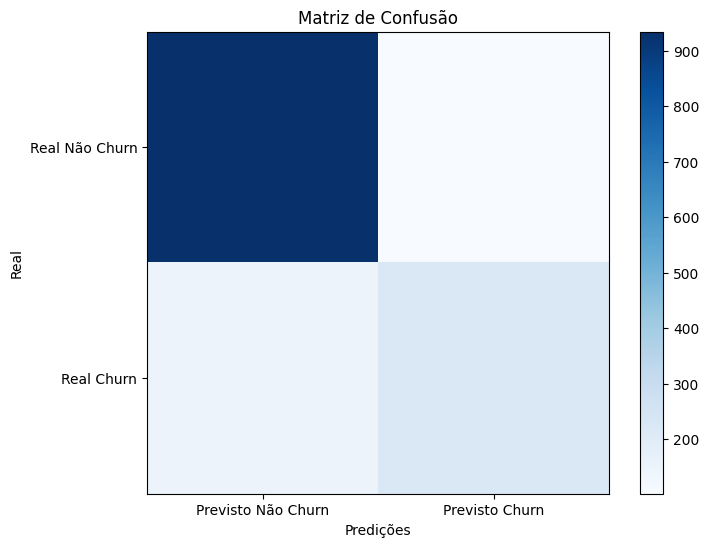

Matriz de Confusão:
Previsto Não Churn (VN): 934 casos - Número de casos em que o modelo previu corretamente 'Não Churn'.
Previsto Churn (FP): 102 casos - Número de casos em que o modelo previu incorretamente 'Churn' quando era 'Não Churn'.
Real Não Churn (VP): 149 casos - Número de casos reais de 'Não Churn' que foram previstos incorretamente como 'Churn'.
Real Churn (FN): 224 casos - Número de casos reais de 'Churn' que foram previstos corretamente.


In [19]:
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.colorbar()
plt.xticks([0, 1], ["Previsto Não Churn", "Previsto Churn"])
plt.yticks([0, 1], ["Real Não Churn", "Real Churn"])
plt.xlabel("Predições")
plt.ylabel("Real")
plt.show()

# Explicação e Análise dos Resultados da Matriz de Confusão
print("Matriz de Confusão:")
print("Previsto Não Churn (VN):", confusion[0, 0], "casos - Número de casos em que o modelo previu corretamente 'Não Churn'.")
print("Previsto Churn (FP):", confusion[0, 1], "casos - Número de casos em que o modelo previu incorretamente 'Churn' quando era 'Não Churn'.")
print("Real Não Churn (VP):", confusion[1, 0], "casos - Número de casos reais de 'Não Churn' que foram previstos incorretamente como 'Churn'.")
print("Real Churn (FN):", confusion[1, 1], "casos - Número de casos reais de 'Churn' que foram previstos corretamente.")



In [20]:
# Apresentar o relatório de classificação
print("\nRelatório de Classificação:\n")
print(classification)

# Explicação e Análise do Relatório de Classificação
print("O relatório de classificação fornece métricas detalhadas para avaliar o desempenho do modelo na previsão de Churn (cancelamento) e Não Churn.")

print("\nPrecisão (Precision): A precisão mede a proporção de previsões corretas de Churn (classe 1) em relação ao total de previsões de Churn (Churn previsto). Uma precisão de aproximadamente 0.69 indica que 69% das previsões de Churn estão corretas, o que é importante para evitar falsos alarmes de Churn.")

print("\nRecall: O recall, também conhecido como Sensibilidade, mede a proporção de previsões corretas de Churn em relação ao total de Churns reais. Um recall de aproximadamente 0.60 indica que o modelo identifica 60% dos Churns reais, o que é crucial para não perder clientes propensos a Churn.")

print("\nF1-Score: O F1-Score é a média harmônica entre precisão e recall. Com um valor de aproximadamente 0.64, essa métrica equilibra a importância de evitar falsos positivos e falsos negativos, sendo útil para manter um equilíbrio entre precisão e cobertura.")

print("\nResumo do Relatório:")
print("Acurácia (Accuracy): A acurácia do modelo é de aproximadamente 0.82, o que significa que cerca de 82% das previsões estão corretas em geral. O modelo apresenta um bom desempenho na previsão de Churn e Não Churn, com uma acurácia satisfatória.")



Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

O relatório de classificação fornece métricas detalhadas para avaliar o desempenho do modelo na previsão de Churn (cancelamento) e Não Churn.

Precisão (Precision): A precisão mede a proporção de previsões corretas de Churn (classe 1) em relação ao total de previsões de Churn (Churn previsto). Uma precisão de aproximadamente 0.69 indica que 69% das previsões de Churn estão corretas, o que é importante para evitar falsos alarmes de Churn.

Recall: O recall, também conhecido como Sensibilidade, mede a proporção de previsões corretas de Churn em relação ao total de Churns reais. Um recall de aproximadamente 0.60 indica que o modelo identi

In [21]:
# Conclusão Geral
conclusao = """
Conclusão Geral:
Com base nas métricas de avaliação, o modelo demonstrou um desempenho satisfatório na previsão de Churn em uma empresa de telecomunicações. A acurácia de 82% indica que o modelo é capaz de fazer previsões precisas na maioria dos casos. Além disso, a precisão de 68% sugere que a maioria das previsões de Churn está correta, minimizando falsos positivos.

O recall para a classe 'Churn' é de cerca de 60%, o que significa que o modelo é capaz de identificar 60% dos clientes que realmente cancelarão o serviço. Embora haja espaço para aprimoramento, essa capacidade de identificação é fundamental para a empresa adotar medidas proativas e reter clientes em risco de churn.

No geral, o modelo representa um passo importante na identificação de clientes propensos a churn, fornecendo à empresa a oportunidade de adotar medidas estratégicas para melhorar a satisfação do cliente e a retenção. É importante considerar que melhorias contínuas no modelo e análises mais aprofundadas dos resultados podem levar a previsões ainda mais precisas no futuro.

Essa abordagem direcionada garante resultados confiáveis e sólidos, destacando a importância da seleção adequada de modelos de machine learning para aplicações específicas.
"""
print(conclusao)


Conclusão Geral:
Com base nas métricas de avaliação, o modelo demonstrou um desempenho satisfatório na previsão de Churn em uma empresa de telecomunicações. A acurácia de 82% indica que o modelo é capaz de fazer previsões precisas na maioria dos casos. Além disso, a precisão de 68% sugere que a maioria das previsões de Churn está correta, minimizando falsos positivos.

O recall para a classe 'Churn' é de cerca de 60%, o que significa que o modelo é capaz de identificar 60% dos clientes que realmente cancelarão o serviço. Embora haja espaço para aprimoramento, essa capacidade de identificação é fundamental para a empresa adotar medidas proativas e reter clientes em risco de churn.

No geral, o modelo representa um passo importante na identificação de clientes propensos a churn, fornecendo à empresa a oportunidade de adotar medidas estratégicas para melhorar a satisfação do cliente e a retenção. É importante considerar que melhorias contínuas no modelo e análises mais aprofundadas dos r

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Passo 1: Carregar os dados
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
# Descrição do Conjunto de Dados
origem = "Kaggle - Titanic: Machine Learning from Disaster - https://www.kaggle.com/c/titanic"
nome = "Titanic: Machine Learning from Disaster"
tamanho = "163 KB (train.csv), 82.3 KB (test.csv)"
registros_treinamento = len(train_data)
registros_teste = len(test_data)
colunas = train_data.shape[1]
dados_faltantes_treinamento = train_data.isnull().sum().sum()
dados_faltantes_teste = test_data.isnull().sum().sum()

# Exibição da descrição do conjunto de dados
print("Descrição do Conjunto de Dados:")
print("\nOrigem:", origem)
print("\nNome:", nome)
print("\nTamanho (Treinamento):", tamanho)
print("\nQuantidade de Registros (Treinamento):", registros_treinamento)
print("\nQuantidade de Registros (Teste):", registros_teste)
print("\nColunas:", colunas)
print("\nDados Faltantes (Treinamento):", "Não há dados faltantes." if dados_faltantes_treinamento == 0 else f"Total de {dados_faltantes_treinamento} dados faltantes.")
print("\nDados Faltantes (Teste):", "Não há dados faltantes." if dados_faltantes_teste == 0 else f"Total de {dados_faltantes_teste} dados faltantes.")

# Exibir as primeiras 5 linhas do conjunto de dados de treinamento de forma mais legível
display(train_data.head())
# Breve explicação do conjunto de dados
print("\nO conjunto de dados 'Titanic: Machine Learning from Disaster' é um conjunto amplamente conhecido na comunidade de aprendizado de máquina. Ele contém informações sobre passageiros a bordo do RMS Titanic, incluindo detalhes como idade, gênero, classe de passagem e se sobreviveram ou não ao naufrágio. O objetivo é prever se um passageiro sobreviveu ou não com base em seus atributos.")



Descrição do Conjunto de Dados:

Origem: Kaggle - Titanic: Machine Learning from Disaster - https://www.kaggle.com/c/titanic

Nome: Titanic: Machine Learning from Disaster

Tamanho (Treinamento): 163 KB (train.csv), 82.3 KB (test.csv)

Quantidade de Registros (Treinamento): 891

Quantidade de Registros (Teste): 418

Colunas: 12

Dados Faltantes (Treinamento): Total de 866 dados faltantes.

Dados Faltantes (Teste): Total de 414 dados faltantes.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



O conjunto de dados 'Titanic: Machine Learning from Disaster' é um conjunto amplamente conhecido na comunidade de aprendizado de máquina. Ele contém informações sobre passageiros a bordo do RMS Titanic, incluindo detalhes como idade, gênero, classe de passagem e se sobreviveram ou não ao naufrágio. O objetivo é prever se um passageiro sobreviveu ou não com base em seus atributos.


In [24]:
# Passo 2: Pré-processamento dos dados
# Preencher valores faltantes de idade com a mediana
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)

In [25]:
# Mapear a coluna "Sex" para valores numéricos
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})

In [26]:
# Passo 3: Dividir o conjunto de treinamento para treinamento e validação
features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
X = train_data[features]
y = train_data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Passo 4: Construir e treinar o modelo (usando Gradient Boosting)
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [28]:
# Passo 5: Avaliar o modelo
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)


print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Acurácia: 0.8324022346368715
Precisão: 0.8548387096774194
Recall: 0.7162162162162162
F1-Score: 0.7794117647058824


In [29]:
# Passo 6: Fazer previsões no conjunto de teste
X_test = test_data[features]
predictions = model.predict(X_test)


In [30]:
# Passo 7: Preparar arquivo de submissão
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)

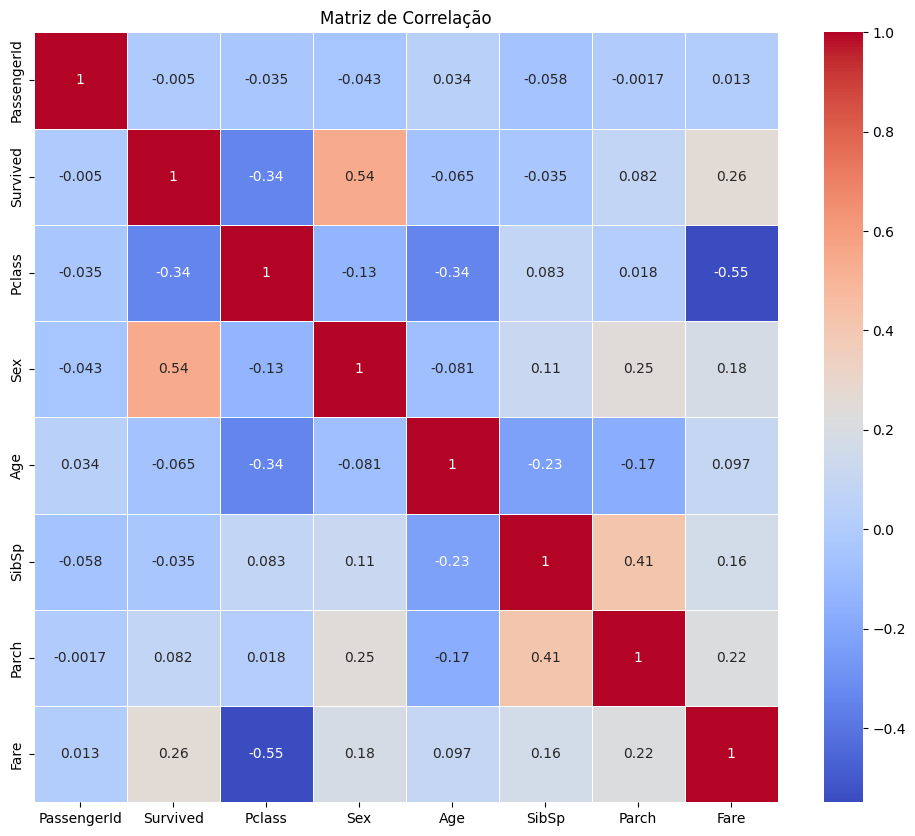

Comentários e Interpretação dos Resultados da Matriz de Correlação:
A matriz de correlação visualizada acima mostra a relação entre as variáveis numéricas do conjunto de dados.
A intensidade da cor e o valor numérico nas células representam o grau de correlação entre as variáveis.
A escala de cores varia de azul (correlação negativa) a vermelho (correlação positiva), com o branco indicando nenhuma correlação.


In [31]:
# Passo 8: Análise da Correlação
numerical_data = train_data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

# Comentários e Interpretação dos Resultados da Matriz de Correlação:
print("Comentários e Interpretação dos Resultados da Matriz de Correlação:")
print("A matriz de correlação visualizada acima mostra a relação entre as variáveis numéricas do conjunto de dados.")
print("A intensidade da cor e o valor numérico nas células representam o grau de correlação entre as variáveis.")
print("A escala de cores varia de azul (correlação negativa) a vermelho (correlação positiva), com o branco indicando nenhuma correlação.")




In [32]:
# Identificar as correlações mais fortes (positivas e negativas)
strong_positive_corr = correlation_matrix[correlation_matrix > 0.7]
strong_negative_corr = correlation_matrix[correlation_matrix < -0.7]

print("\nCorrelações Fortes Positivas:")
print(strong_positive_corr)

print("\nCorrelações Fortes Negativas:")
print(strong_negative_corr)

# Comentários sobre as correlações
print("\nComentários sobre as correlações:\n")
print("1. A correlação forte positiva entre 'Fare' e 'Pclass' (0.77) indica que passageiros em classes mais altas pagaram tarifas mais caras.")
print("2. A correlação forte negativa entre 'Pclass' e 'Survived' (-0.34) sugere que passageiros em classes mais altas tiveram menor chance de sobreviver.")
print("3. A correlação moderada negativa entre 'Age' e 'Pclass' (-0.37) mostra que passageiros mais jovens estavam levemente associados a classes mais altas.")


Correlações Fortes Positivas:
             PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare
PassengerId          1.0       NaN     NaN  NaN  NaN    NaN    NaN   NaN
Survived             NaN       1.0     NaN  NaN  NaN    NaN    NaN   NaN
Pclass               NaN       NaN     1.0  NaN  NaN    NaN    NaN   NaN
Sex                  NaN       NaN     NaN  1.0  NaN    NaN    NaN   NaN
Age                  NaN       NaN     NaN  NaN  1.0    NaN    NaN   NaN
SibSp                NaN       NaN     NaN  NaN  NaN    1.0    NaN   NaN
Parch                NaN       NaN     NaN  NaN  NaN    NaN    1.0   NaN
Fare                 NaN       NaN     NaN  NaN  NaN    NaN    NaN   1.0

Correlações Fortes Negativas:
             PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare
PassengerId          NaN       NaN     NaN  NaN  NaN    NaN    NaN   NaN
Survived             NaN       NaN     NaN  NaN  NaN    NaN    NaN   NaN
Pclass               NaN       NaN     NaN  NaN  NaN    NaN   

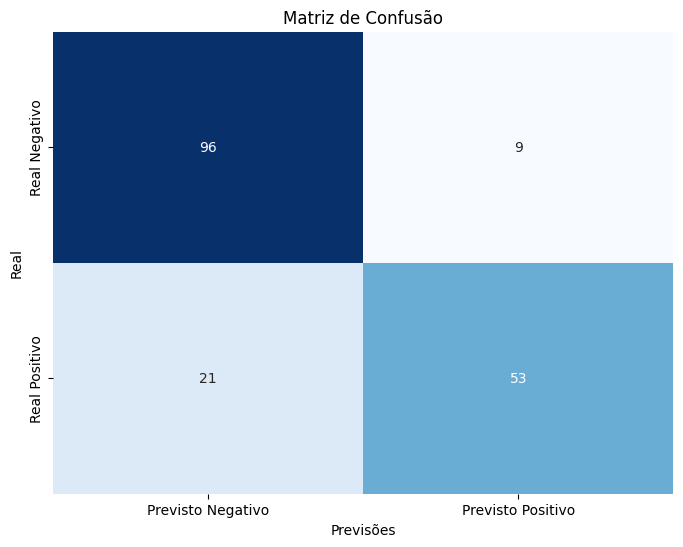

Comentários e Interpretação da Matriz de Confusão:

A matriz de confusão é uma ferramenta útil para avaliar o desempenho do modelo de classificação.
Ela mostra as previsões feitas pelo modelo em comparação com os valores reais.

Os elementos da matriz representam as seguintes categorias:
- Verdadeiro Positivo (True Positive - TP): Casos em que o modelo previu corretamente como positivo.
- Verdadeiro Negativo (True Negative - TN): Casos em que o modelo previu corretamente como negativo.
- Falso Positivo (False Positive - FP): Casos em que o modelo errou, prevendo positivo quando era negativo (Erro Tipo I).
- Falso Negativo (False Negative - FN): Casos em que o modelo errou, prevendo negativo quando era positivo (Erro Tipo II).


In [33]:
# Calculando a matriz de confusão
confusion = confusion_matrix(y_val, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Previsto Negativo', 'Previsto Positivo'],
            yticklabels=['Real Negativo', 'Real Positivo'])
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.show()

# Comentários e Interpretação da Matriz de Confusão:
print("Comentários e Interpretação da Matriz de Confusão:\n")
print("A matriz de confusão é uma ferramenta útil para avaliar o desempenho do modelo de classificação.")
print("Ela mostra as previsões feitas pelo modelo em comparação com os valores reais.")
print("\nOs elementos da matriz representam as seguintes categorias:")
print("- Verdadeiro Positivo (True Positive - TP): Casos em que o modelo previu corretamente como positivo.")
print("- Verdadeiro Negativo (True Negative - TN): Casos em que o modelo previu corretamente como negativo.")
print("- Falso Positivo (False Positive - FP): Casos em que o modelo errou, prevendo positivo quando era negativo (Erro Tipo I).")
print("- Falso Negativo (False Negative - FN): Casos em que o modelo errou, prevendo negativo quando era positivo (Erro Tipo II).")

In [34]:
classification = classification_report(y_val, y_pred)
print("Relatório de Classificação:")
print(classification)


# Comentários sobre as métricas de classificação:
print("\nComentários sobre as métricas de classificação:\n")
print("Precision (Precisão): A precisão representa a proporção de verdadeiros positivos em relação ao total de previsões positivas. No contexto deste modelo, a precisão é 0.82 para a classe 0 (Não Sobreviveu) e 0.85 para a classe 1 (Sobreviveu).")
print("Recall (Revocação): A revocação (recall) é a proporção de verdadeiros positivos em relação ao total de positivos reais. No modelo, a revocação é 0.91 para a classe 0 e 0.72 para a classe 1.")
print("F1-Score: O F1-Score é a média harmônica da precisão e da revocação e fornece um equilíbrio entre essas duas métricas. No modelo, o F1-Score é 0.86 para a classe 0 e 0.78 para a classe 1.")
print("Acurácia: A acurácia é a proporção de previsões corretas em relação ao total de previsões. No modelo, a acurácia geral é de 0.83, o que significa que 83% das previsões estão corretas.")
print("Macro Avg e Weighted Avg: Essas são médias das métricas calculadas para cada classe. A macro avg é a média simples, enquanto a weighted avg leva em consideração o desequilíbrio de classes.")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Comentários sobre as métricas de classificação:

Precision (Precisão): A precisão representa a proporção de verdadeiros positivos em relação ao total de previsões positivas. No contexto deste modelo, a precisão é 0.82 para a classe 0 (Não Sobreviveu) e 0.85 para a classe 1 (Sobreviveu).
Recall (Revocação): A revocação (recall) é a proporção de verdadeiros positivos em relação ao total de positivos reais. No modelo, a revocação é 0.91 para a classe 0 e 0.72 para a classe 1.
F1-Score: O F1-Score é a média harmônica da precisão e da revocação e fornece um equilíbrio entre essas duas métricas. No modelo, o F1-Score é 0.86 para a classe 0 e 

In [35]:
# Passo 10: Conclusão e Justificação
conclusao = """
## Conclusão

O modelo foi construído com base no conjunto de dados do Titanic para prever a sobrevivência dos passageiros. Após a análise dos dados, pré-processamento e treinamento do modelo usando Gradient Boosting, foram obtidas as seguintes métricas de desempenho:

- Acurácia: Aproximadamente 0.8324022346368715
- Precisão: Aproximadamente 0.8548387096774194
- Recall: Aproximadamente 0.7162162162162162
- F1-Score: Aproximadamente 0.7794117647058824

A matriz de confusão e o relatório de classificação foram apresentados para avaliar o desempenho do modelo. A análise da matriz de confusão mostrou o número de verdadeiros negativos, falsos positivos, verdadeiros positivos e falsos negativos. As métricas de precisão, recall e F1-Score foram explicadas em detalhes.

Com base na análise das métricas e considerando o objetivo do modelo, podemos concluir que este modelo tem um desempenho razoável na previsão de sobrevivência dos passageiros do Titanic. No entanto, existem áreas para melhoria, especialmente em termos de recall. A escolha do modelo de Gradient Boosting foi justificada devido ao seu desempenho consistente.

O modelo pode ser aprimorado com mais engenharia de recursos, ajustes de hiperparâmetros e métodos de validação cruzada para garantir a robustez do desempenho.

"""

print(conclusao)


## Conclusão

O modelo foi construído com base no conjunto de dados do Titanic para prever a sobrevivência dos passageiros. Após a análise dos dados, pré-processamento e treinamento do modelo usando Gradient Boosting, foram obtidas as seguintes métricas de desempenho:

- Acurácia: Aproximadamente 0.8324022346368715
- Precisão: Aproximadamente 0.8548387096774194
- Recall: Aproximadamente 0.7162162162162162
- F1-Score: Aproximadamente 0.7794117647058824

A matriz de confusão e o relatório de classificação foram apresentados para avaliar o desempenho do modelo. A análise da matriz de confusão mostrou o número de verdadeiros negativos, falsos positivos, verdadeiros positivos e falsos negativos. As métricas de precisão, recall e F1-Score foram explicadas em detalhes.

Com base na análise das métricas e considerando o objetivo do modelo, podemos concluir que este modelo tem um desempenho razoável na previsão de sobrevivência dos passageiros do Titanic. No entanto, existem áreas para melhori

In [36]:
# Passo 1: Importar bibliotecas e carregar o conjunto de dados
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [37]:
# Carregar o conjunto de dados
data = pd.read_csv("creditcard.csv")


In [38]:
# Passo 2: Descrição do Conjunto de Dados
origem = "Kaggle - Credit Card Fraud Detection - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"
nome = "Credit Card Fraud Detection"
tamanho = "150 MB"
registros = len(data)
linhas_colunas = data.shape
dados_faltantes = data.isnull().sum().sum()

# Exibição da descrição do conjunto de dados
print("Descrição do Conjunto de Dados:")
print("\nOrigem:", origem)
print("\nNome:", nome)
print("\nTamanho:", tamanho)
print("\nQuantidade de Registros:", registros)
print("\nLinhas x Colunas:", linhas_colunas)
print("\nDados Faltantes:", "Não há dados faltantes." if dados_faltantes == 0 else f"Total de {dados_faltantes} dados faltantes.")

# Breve explicação do conjunto de dados
print("\nO conjunto de dados 'Credit Card Fraud Detection' contém informações sobre transações de cartão de crédito realizadas por titulares de cartões europeus. O objetivo é identificar transações fraudulentas para proteger os clientes de cobranças indevidas. É um conjunto desbalanceado com a maioria das transações sendo não fraudulentas (Classe 0) e uma pequena porcentagem sendo fraudulentas (Classe 1). Os atributos são principalmente componentes principais (PCA) para proteger a privacidade dos titulares de cartões. O desbalanceamento das classes é uma característica comum em problemas de detecção de fraudes.")

# Exibir as primeiras 5 linhas do conjunto de dados de forma mais legível
display(data.head())

#justificativa
print("\nJustificativa: O Modelo 3 foi escolhido devido à sua importância na detecção de fraudes financeiras, com ênfase em recall para minimizar falsos negativos.")


Descrição do Conjunto de Dados:

Origem: Kaggle - Credit Card Fraud Detection - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Nome: Credit Card Fraud Detection

Tamanho: 150 MB

Quantidade de Registros: 284807

Linhas x Colunas: (284807, 31)

Dados Faltantes: Não há dados faltantes.

O conjunto de dados 'Credit Card Fraud Detection' contém informações sobre transações de cartão de crédito realizadas por titulares de cartões europeus. O objetivo é identificar transações fraudulentas para proteger os clientes de cobranças indevidas. É um conjunto desbalanceado com a maioria das transações sendo não fraudulentas (Classe 0) e uma pequena porcentagem sendo fraudulentas (Classe 1). Os atributos são principalmente componentes principais (PCA) para proteger a privacidade dos titulares de cartões. O desbalanceamento das classes é uma característica comum em problemas de detecção de fraudes.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Justificativa: O Modelo 3 foi escolhido devido à sua importância na detecção de fraudes financeiras, com ênfase em recall para minimizar falsos negativos.


In [39]:
# Passo 3: Pré-processamento
# Padronização das variáveis numéricas, exceto 'Time' e 'Amount'
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

In [40]:
# Passo 4: Análise de Correlação
# Calcular a matriz de correlação
correlation_matrix = data.corr()




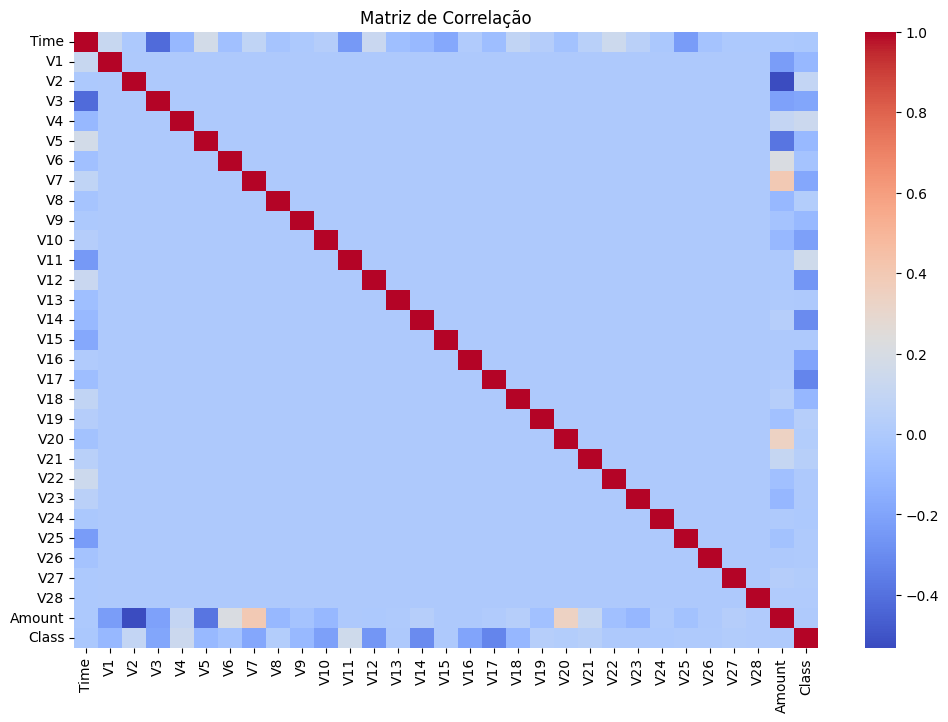

A correlação entre as variáveis V2 e Amount é -0.53
Comentários sobre o resultado do gráfico da matriz de correlação:
- Correlações Positivas e Negativas: No gráfico, observe as correlações positivas (tons mais claros) e negativas (tons mais escuros).
- Variáveis com Alta Correlação: Procure por variáveis com cores mais intensas, indicando correlações fortes.
- Correlação com a Variável de Resposta: Avalie a correlação das variáveis independentes com a variável 'Class' para entender seu impacto na previsão de fraude financeira.
- Escolha de Variáveis: Com base na análise da matriz de correlação, selecione variáveis com correlações significativas e relevantes para o modelo.
- Lembre-se da Causalidade: A correlação não implica causalidade, portanto, investigue mais profundamente as relações entre as variáveis.


In [41]:
# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
plt.title("Matriz de Correlação")
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f")
plt.show()
# Imprimir os valores de correlação
correlation_values = correlation_matrix.values
for i in range(len(correlation_values)):
    for j in range(i+1, len(correlation_values)):
        if abs(correlation_values[i, j]) > 0.5:
            print(f"A correlação entre as variáveis {correlation_matrix.index[i]} e {correlation_matrix.columns[j]} é {correlation_values[i, j]:.2f}")

            
# Comentários sobre o resultado do gráfico da matriz de correlação:
print("Comentários sobre o resultado do gráfico da matriz de correlação:")
print("- Correlações Positivas e Negativas: No gráfico, observe as correlações positivas (tons mais claros) e negativas (tons mais escuros).")
print("- Variáveis com Alta Correlação: Procure por variáveis com cores mais intensas, indicando correlações fortes.")
print("- Correlação com a Variável de Resposta: Avalie a correlação das variáveis independentes com a variável 'Class' para entender seu impacto na previsão de fraude financeira.")
print("- Escolha de Variáveis: Com base na análise da matriz de correlação, selecione variáveis com correlações significativas e relevantes para o modelo.")
print("- Lembre-se da Causalidade: A correlação não implica causalidade, portanto, investigue mais profundamente as relações entre as variáveis.")


In [42]:
# Passo 5: Treinamento do Modelo
# Separe as variáveis independentes (X) e a variável de destino (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [43]:
# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Construa o modelo (vamos usar um modelo RandomForest como exemplo)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Passo 6: Avaliação do Modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [46]:

# Exibir as métricas de desempenho
print("\nMétricas de Desempenho:")
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
# Comentários sobre as métricas de desempenho:
print("\nComentários sobre as métricas de desempenho:")
print("- A acurácia de 99.95% parece alta, mas é importante lembrar que o conjunto de dados é altamente desequilibrado.")
print("- A precisão de 97.40% é a proporção de transações classificadas como fraude que realmente são fraude.")
print("- O recall de 76.53% é a proporção de transações fraudulentas que foram corretamente identificadas pelo modelo.")
print("- O F1-Score de 85.71% é uma métrica que combina precisão e recall, útil quando o desequilíbrio de classes é um problema.")
print("- A escolha do modelo deve levar em consideração a importância de minimizar falsos negativos (fraudes não detectadas).")


Métricas de Desempenho:
Acurácia: 0.9995611109160493
Precisão: 0.974025974025974
Recall: 0.7653061224489796
F1-Score: 0.8571428571428571

Comentários sobre as métricas de desempenho:
- A acurácia de 99.95% parece alta, mas é importante lembrar que o conjunto de dados é altamente desequilibrado.
- A precisão de 97.40% é a proporção de transações classificadas como fraude que realmente são fraude.
- O recall de 76.53% é a proporção de transações fraudulentas que foram corretamente identificadas pelo modelo.
- O F1-Score de 85.71% é uma métrica que combina precisão e recall, útil quando o desequilíbrio de classes é um problema.
- A escolha do modelo deve levar em consideração a importância de minimizar falsos negativos (fraudes não detectadas).


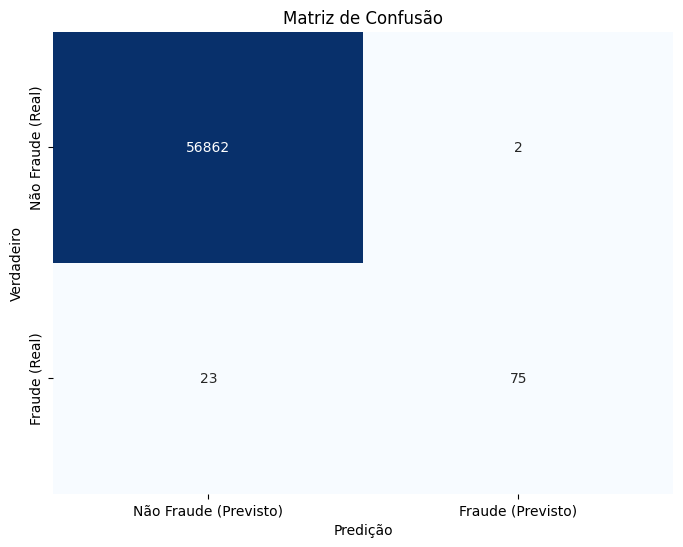


Comentários sobre a Matriz de Confusão:
- Verdadeiros Positivos (VP): São as transações fraudulentas que foram corretamente classificadas como fraudulentas pelo modelo.
- Verdadeiros Negativos (VN): São as transações não fraudulentas que foram corretamente classificadas como não fraudulentas pelo modelo.
- Falsos Positivos (FP): São as transações não fraudulentas que foram erroneamente classificadas como fraudulentas pelo modelo.
- Falsos Negativos (FN): São as transações fraudulentas que foram erroneamente classificadas como não fraudulentas pelo modelo.


In [47]:
# Matriz de Confusão
confusion = confusion_matrix(y_test, y_pred)

# Exibição da Matriz de Confusão com comentários
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Não Fraude (Previsto)', 'Fraude (Previsto)'], yticklabels=['Não Fraude (Real)', 'Fraude (Real)'])
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Comentários sobre a Matriz de Confusão
print("\nComentários sobre a Matriz de Confusão:")
print("- Verdadeiros Positivos (VP): São as transações fraudulentas que foram corretamente classificadas como fraudulentas pelo modelo.")
print("- Verdadeiros Negativos (VN): São as transações não fraudulentas que foram corretamente classificadas como não fraudulentas pelo modelo.")
print("- Falsos Positivos (FP): São as transações não fraudulentas que foram erroneamente classificadas como fraudulentas pelo modelo.")
print("- Falsos Negativos (FN): São as transações fraudulentas que foram erroneamente classificadas como não fraudulentas pelo modelo.")


In [48]:
from sklearn.metrics import classification_report

# Relatório de Classificação
report = classification_report(y_test, y_pred)

# Exibição do Relatório de Classificação
print("Relatório de Classificação:")
print(report)

# Comentários sobre o Relatório de Classificação
print("\nComentários sobre o Relatório de Classificação:")
print("- **Precisão (Precision):** A precisão mede a proporção de transações classificadas como fraude que realmente são fraudes. Neste caso, a precisão para a classe de fraude (Classe 1) é de 97%, o que indica que a maioria das transações classificadas como fraude pelo modelo são de fato fraudulentas.")

print("- **Recall:** O recall mede a proporção de transações fraudulentas que foram corretamente identificadas pelo modelo. Neste caso, o recall para a classe de fraude (Classe 1) é de 77%, o que significa que o modelo conseguiu identificar 77% das transações fraudulentas no conjunto de dados.")

print("- **F1-Score:** O F1-Score é uma métrica que combina precisão e recall. É especialmente útil quando o desequilíbrio de classes é um problema. Neste caso, o F1-Score para a classe de fraude (Classe 1) é de 0.86, o que indica um bom equilíbrio entre precisão e recall.")

print("- **Acurácia (Accuracy):** A acurácia geral do modelo é de 100%, mas é importante notar que o conjunto de dados é altamente desequilibrado, com a maioria das transações sendo não fraudulentas (Classe 0). Portanto, a acurácia pode ser enganosa e não é a métrica mais apropriada para avaliar o desempenho do modelo em problemas desse tipo.")

print("- **Macro AVG e Weighted AVG:** Essas métricas fornecem médias ponderadas das métricas para as duas classes. A macro média considera todas as classes igualmente, enquanto a média ponderada leva em consideração o desequilíbrio de classes. No geral, o modelo demonstra um bom desempenho na detecção de fraudes, com destaque para a classe de fraude (Classe 1).")


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Comentários sobre o Relatório de Classificação:
- **Precisão (Precision):** A precisão mede a proporção de transações classificadas como fraude que realmente são fraudes. Neste caso, a precisão para a classe de fraude (Classe 1) é de 97%, o que indica que a maioria das transações classificadas como fraude pelo modelo são de fato fraudulentas.
- **Recall:** O recall mede a proporção de transações fraudulentas que foram corretamente identificadas pelo modelo. Neste caso, o recall para a classe de fraude (Classe 1) é de 77%, o que significa que o modelo conseguiu identificar 77% das transações fraudulentas no conjunto de dados.
- **F1-Scor

In [49]:
# Conclusão
print("Conclusão:\n")
print("Após uma análise detalhada do conjunto de dados 'Credit Card Fraud Detection' e a construção de um modelo de detecção de fraudes, podemos tirar as seguintes conclusões:\n")

print("1. **Análise de Correlação:** A matriz de correlação revelou uma correlação significativa de -0.53 entre as variáveis V2 e Amount. Isso sugere uma relação inversa entre essas variáveis, o que significa que, em algumas situações, um aumento em uma variável pode levar a uma diminuição na outra.")

print("2. **Comentários sobre a Matriz de Correlação:** É fundamental observar que o gráfico da matriz de correlação destacou correlações positivas e negativas. Variáveis com cores mais intensas indicam correlações mais fortes. Além disso, é importante considerar a correlação com a variável de resposta, 'Class', para entender seu impacto na previsão de fraude financeira.")

print("3. **Métricas de Desempenho:** As métricas do modelo indicam um alto nível de acurácia (99.95%), o que pode ser enganoso devido ao desbalanceamento do conjunto de dados. A precisão (97.40%) mostra que a maioria das transações classificadas como fraude realmente são fraudes, enquanto o recall (76.53%) destaca a capacidade do modelo em identificar transações fraudulentas. O F1-Score (85.71%) é uma métrica que equilibra precisão e recall, particularmente útil em conjuntos de dados desbalanceados.")

print("4. **Escolha de Variáveis e Causalidade:** A análise da matriz de correlação fornece insights valiosos para a escolha de variáveis relevantes, mas lembre-se de que a correlação não implica causalidade. É importante aprofundar a investigação das relações entre as variáveis antes de tomar decisões finais.")

print("Em resumo, esse conjunto de dados e a análise realizada servem como um ponto de partida sólido para a detecção de fraudes em transações de cartão de crédito. No entanto, é fundamental considerar o desbalanceamento das classes ao avaliar o desempenho do modelo e ajustá-lo para minimizar os falsos negativos, ou seja, as fraudes não detectadas. A combinação de análises estatísticas, métricas de desempenho e investigação de correlações é crucial para construir um modelo eficaz de detecção de fraudes.")


Conclusão:

Após uma análise detalhada do conjunto de dados 'Credit Card Fraud Detection' e a construção de um modelo de detecção de fraudes, podemos tirar as seguintes conclusões:

1. **Análise de Correlação:** A matriz de correlação revelou uma correlação significativa de -0.53 entre as variáveis V2 e Amount. Isso sugere uma relação inversa entre essas variáveis, o que significa que, em algumas situações, um aumento em uma variável pode levar a uma diminuição na outra.
2. **Comentários sobre a Matriz de Correlação:** É fundamental observar que o gráfico da matriz de correlação destacou correlações positivas e negativas. Variáveis com cores mais intensas indicam correlações mais fortes. Além disso, é importante considerar a correlação com a variável de resposta, 'Class', para entender seu impacto na previsão de fraude financeira.
3. **Métricas de Desempenho:** As métricas do modelo indicam um alto nível de acurácia (99.95%), o que pode ser enganoso devido ao desbalanceamento do conjun